In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from subprocess import check_output
#check_output(["ls",])

In [3]:
df_train=pd.read_csv('D:/dataset/train.csv')
df_songs=pd.read_csv('D:/dataset/songs.csv')
df_songs_extra=pd.read_csv('D:/dataset/song_extra_info.csv')
df_members=pd.read_csv('D:/dataset/members.csv',parse_dates=
                       ['registration_init_time','expiration_date'])

df_test=pd.read_csv('D:/dataset/test.csv')

In [4]:
print('Number of common users in both the datasets：',len(set.intersection(
            set(df_train['msno']),set(df_test['msno']))))

Number of common users in both the datasets： 21483


In [5]:
print('训练集和测试集中 共有的用户：',len(set.intersection(
    set(df_train['msno']),set(df_test['msno'])
)))

print('训练集合测试集中都出现的歌曲：',len(set.intersection(
    set(df_train['song_id']),set(df_test['song_id'])
)))

print('训练集中的歌曲数量：',df_train['song_id'].unique().shape[0])
print('测试集中的歌曲数量：',df_test['song_id'].unique().shape[0])

print('训练集中的用户数量：',df_train['msno'].unique().shape[0])
print('测试集中的用户数量：',df_test['msno'].unique().shape[0])



训练集和测试集中 共有的用户： 21483
训练集合测试集中都出现的歌曲： 164880
训练集中的歌曲数量： 359966
测试集中的歌曲数量： 224753
训练集中的用户数量： 30755
测试集中的用户数量： 25131


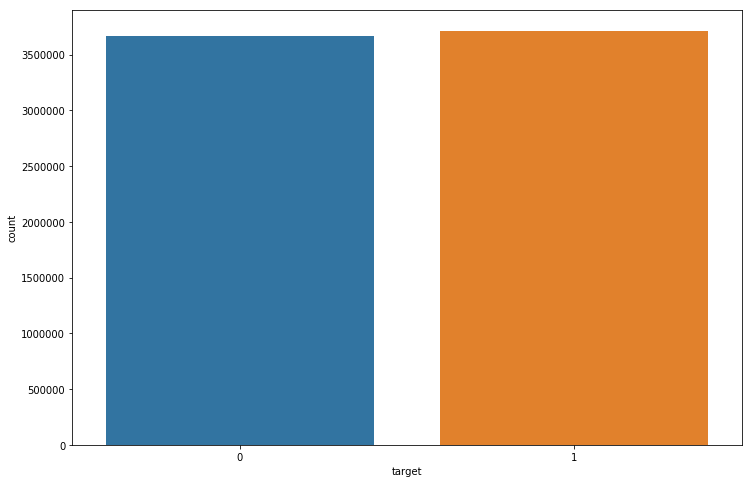

In [6]:
#查看训练集中 订阅与非订阅用户比例
plt.figure(figsize=(12,8))
sns.countplot(df_train['target'])

In [7]:
#将歌曲合并到训练集  合并原则:song_id
df_train=df_train.merge(df_songs,on='song_id',how='left')
#将歌曲额外信息合并到训练集 合并原则：song_id
df_train=df_train.merge(df_songs_extra,on='song_id',how='left')
print(df_train.head())


                                           msno  \
0  FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=   
1  Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=   
2  Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=   
3  Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=   
4  FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=   

                                        song_id source_system_tab  \
0  BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=           explore   
1  bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=        my library   
2  JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=        my library   
3  2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=        my library   
4  3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=           explore   

    source_screen_name      source_type  target  song_length genre_ids  \
0              Explore  online-playlist       1     206471.0       359   
1  Local playlist more   local-playlist       1     284584.0      1259   
2  Local playlist more   local-playlist       1     2253

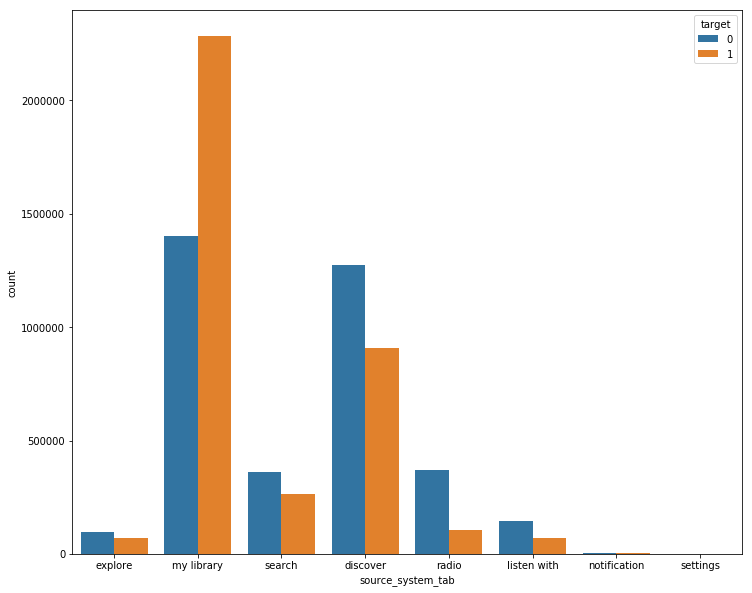

In [8]:
#条状图展示事件触发类型
plt.figure(figsize=(12,10))
sns.countplot(df_train['source_system_tab'],hue=df_train['target'])
#plt.show()

[Text(0,0,'online-playlist'),
 Text(0,0,'local-playlist'),
 Text(0,0,'local-library'),
 Text(0,0,'top-hits-for-artist'),
 Text(0,0,'album'),
 Text(0,0,'song-based-playlist'),
 Text(0,0,'radio'),
 Text(0,0,'song'),
 Text(0,0,'listen-with'),
 Text(0,0,'artist'),
 Text(0,0,'topic-article-playlist'),
 Text(0,0,'my-daily-playlist')]

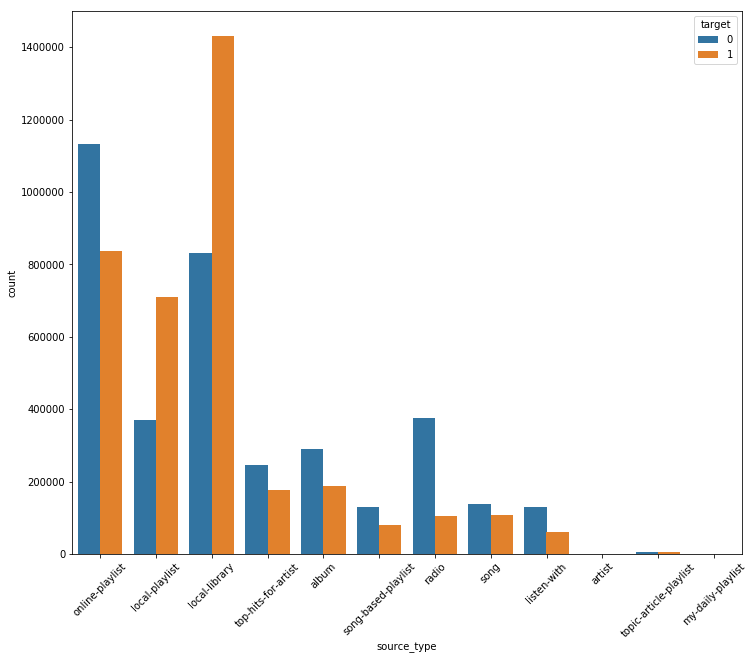

In [9]:
#查看 音乐入口类型
plt.figure(figsize=(12,10))
g=sns.countplot(df_train['source_type'],hue=df_train['target'])
locs,labels=plt.xticks()
g.set_xticklabels(labels,rotation=45)
#plt.show()

In [10]:
#去掉训练集中，song_length为缺失值的项
df_train.dropna(subset=['song_length'],inplace=True)
df_train.dropna(subset=['language'],inplace=True)


 3.0     4044643
 52.0    1864789
 31.0     656623
-1.0      308752
 17.0     245136
 10.0     171904
 24.0      78621
 59.0       4193
 45.0       2397
 38.0        210
Name: language, dtype: int64


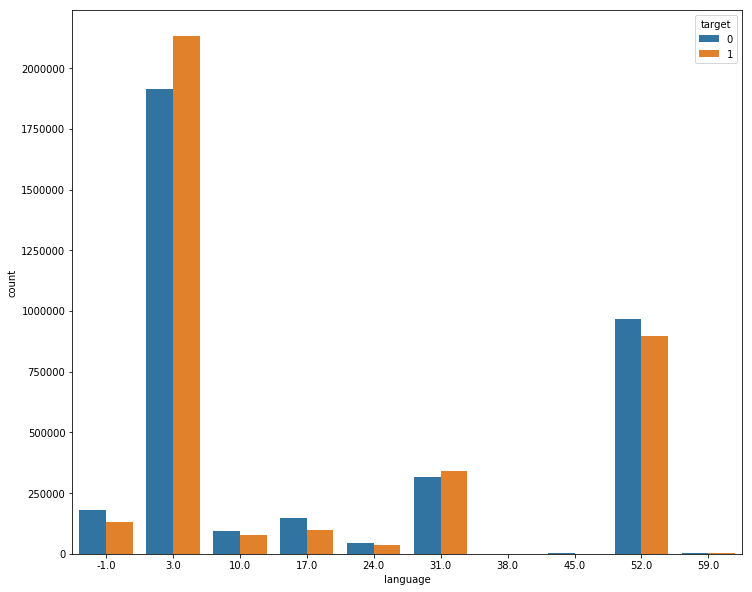

In [11]:
#将触发事件、播放音乐入口的类型改为category
df_train['source_system_tab']=df_train['source_system_tab'].astype('category')
df_train['source_type']=df_train['source_type'].astype('category')

#查看语言类型
print(df_train['language'].value_counts())

plt.figure(figsize=(12,10))
sns.countplot(df_train['language'],hue=df_train['target'])
#plt.show()

(-1, 100)

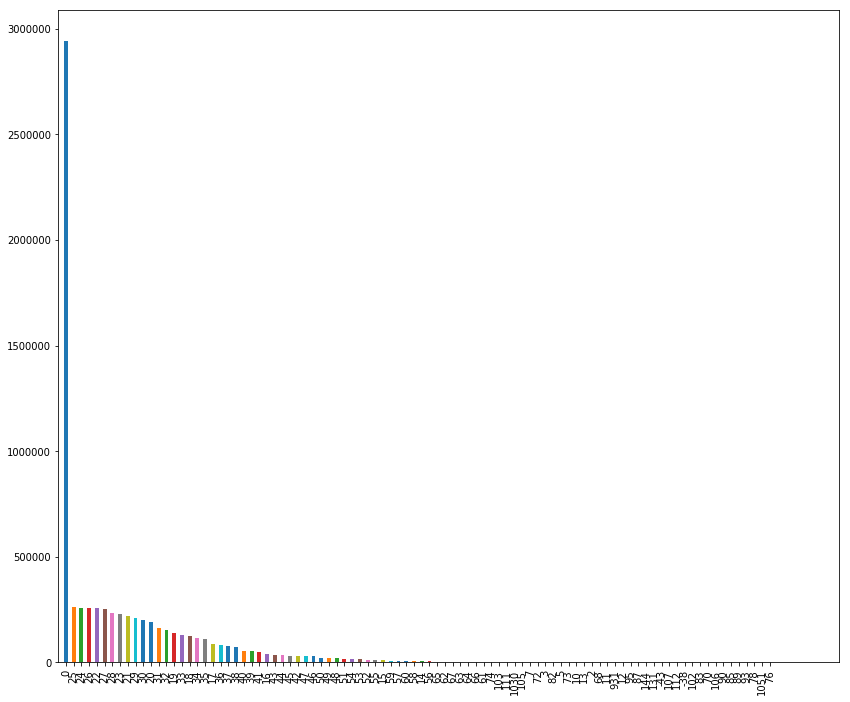

In [12]:

#将用户的信息合并到训练集
df_train=df_train.merge(df_members,on='msno',how='left')

plt.figure(figsize=(14,12))
df_train['bd'].value_counts().plot.bar()
plt.xlim([-1,100])
#plt.show()

In [13]:

#从柱状图中可以看出大约40%的用户年龄为0，
#查看年龄小于0的用户
print('年龄小于0的样本',len(df_train.query('bd<0')))

#去掉年龄小于0的样本
df_train=df_train.query('bd>=0')#195


年龄小于0的样本 195


In [14]:
#年龄大于100的样本
print('年领大于100的样本有多少：',len(df_train.query('bd>100')))#6508
#从年龄小于0 和大于100的数量来看，所占比例较小，因此删除年龄小于0，大于100的样本
df_train=df_train.query('bd >0 and bd <=80')

#查看训练集总体情况
print(df_train.info())


年领大于100的样本有多少： 6508
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4429227 entries, 1 to 7377263
Data columns (total 20 columns):
msno                      object
song_id                   object
source_system_tab         category
source_screen_name        object
source_type               category
target                    int64
song_length               float64
genre_ids                 object
artist_name               object
composer                  object
lyricist                  object
language                  float64
name                      object
isrc                      object
city                      int64
bd                        int64
gender                    object
registered_via            int64
registration_init_time    datetime64[ns]
expiration_date           datetime64[ns]
dtypes: category(2), datetime64[ns](2), float64(2), int64(4), object(10)
memory usage: 650.5+ MB
None
